# RECOMMENDATION SYSTEMS ASSIGNMENT:

In [8]:
# lets import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# let us Read Data file
ratings_file = pd.read_csv(r'C:\Users\metimats\Desktop\beermart\beer_data.csv')

In [9]:
#lets see the data
ratings_file.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [10]:
#lets see the details
ratings_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [11]:
#lets check the null values in the data set
ratings_file.isnull().sum(axis=0)

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

we can see that there are 100 null values in review_profilename, will have to remove these to process for further analysis


In [12]:
#lets drop the null values from data set
ratings_file = ratings_file.dropna()

In [13]:
#lets check the null values in the data set again
ratings_file.isnull().sum(axis=0)

beer_beerid           0
review_profilename    0
review_overall        0
dtype: int64

The dataset now appears good with zero null values

In [15]:
#lets check for duplicate values now
ratings_file.duplicated(['beer_beerid', 'review_profilename']).sum()

1422

we can see that there are totally 1422 duplicates values w.r.t beer_beerid and review_profilename
lets proceed with eliminating these duplicates

In [16]:
#lets drop the duplicates with keeping th first values in it
ratings_file = ratings_file.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

#lets check for duplicate values again
ratings_file.duplicated(['beer_beerid', 'review_profilename']).sum()

0

Now the data looks better without duplicate values

In [18]:
#lets see the unique values count in beer_beerid column
ratings_file.beer_beerid.nunique(dropna = True) 

40304

In [20]:
#lets see the unique values count in review_profilename
ratings_file.review_profilename.nunique(dropna = True)

22497

In [21]:
#lets see how the data is present in the set
ratings_file.describe()

,beer_beerid,review_overall
count,474462.000000,474462.000000
mean,21674.478038,3.814274
std,21798.233764,0.720484
min,3.000000,0.000000
25%,1717.000000,3.500000
50%,13896.000000,4.000000
75%,39417.000000,4.500000
max,77317.000000,5.000000


# 1.Data Preparation

Choose only those beers that have at least N number of reviews.

Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [22]:
#lets check the count of reviews on beerid's
rating_count_beerid = pd.DataFrame(ratings_file.beer_beerid.value_counts(sort=True))

In [24]:
rating_count_beerid.shape

(40304, 1)

we observe that there are tottaly 40304 unique beer id's among the total dataset

In [26]:
#lets see the dataframe
rating_count_beerid.head()

,beer_beerid
2093,977
412,966
1904,902
1093,840
92,812


Text(0.5, 0, 'number of reviews')

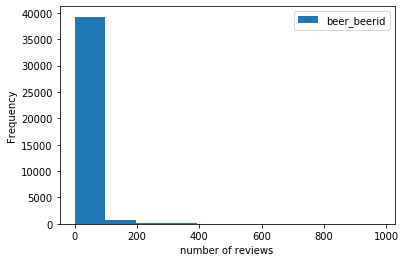

In [33]:
#lets plot a histogram and see the behaviour
rating_count_beerid.plot.hist()
plt.xlabel('number of reviews')

we can observe that majority of the beerid's lies between 0 to 100 which have been reviewed
hence lets check the range of 0 to 100 and see it

In [34]:
#lets see the beerid's which have recieved less than or equal to 100 reviews
count_of_beerid = pd.DataFrame(rating_count_beerid[rating_count_beerid<=100])

Text(0.5, 0, 'number of reviews')

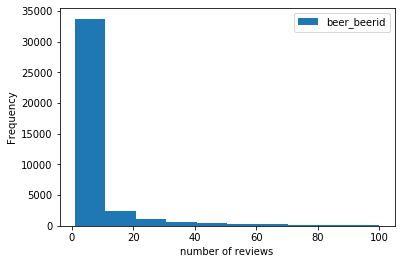

In [35]:
count_of_beerid.plot.hist()
plt.xlabel('number of reviews')

we can observe that most of them lie in the range between 0 to 50

In [40]:
#let us see the no of Beerid's which have recieved only 1 review
count_beerid_with1_rating = pd.DataFrame(rating_count_beerid[rating_count_beerid==1]).sum()
print(count_beerid_with1_rating)

beer_beerid    18080.0
dtype: float64


so there are totally 18080 beerid's which have recieved single review

In [41]:
#lets see th eno of beerid's which have review count in the range of 0 to 50
count_beerid_rating_range1 = pd.DataFrame(rating_count_beerid[rating_count_beerid<= 50]).sum()
print(count_beerid_rating_range1)

beer_beerid    180265.0
dtype: float64


There are totally 180265 no of beerid's  which have recieved reviews between range of 0 to 50 

Hence let us consider the N value to be at 50 and proceed further for analysis

we will remove these beerid's to filter the extremely low rated beer's 

In [42]:
# let us group by beerid's and see the variations in the review
beer_file = ratings_file.groupby('beer_beerid')['review_overall'].count().reset_index()
print(beer_file.count())

beer_file = beer_file.sort_values('review_overall', ascending=False)

beersubset = beer_file[beer_file.review_overall >= 50]
beersubset.info()

beer_beerid       40304
review_overall    40304
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1574 to 39270
Data columns (total 2 columns):
beer_beerid       2064 non-null int64
review_overall    2064 non-null int64
dtypes: int64(2)
memory usage: 48.4 KB


In [45]:
#now lets check the review by considering user 
review_profiles = pd.DataFrame(ratings_file.review_profilename.value_counts(sort=True))
review_profiles.shape

(22497, 1)

so there are totally 22497 unique users who have given reviews for the beer's

Text(0.5, 0, 'no of reviews')

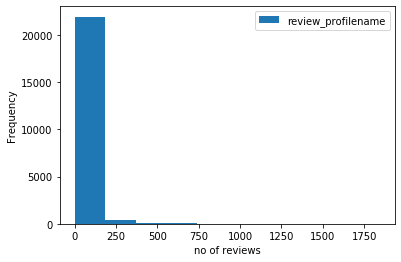

In [46]:
#lets plot a histogram and see the behaviour
review_profiles.plot.hist()
plt.xlabel('no of reviews')

we can observe that most of the users lie in the range of 0 to 125 times where the reviews are given

In [47]:
#lets see the users who have given 0 to 125 reviews
review_profiles_1 = pd.DataFrame(review_profiles[review_profiles<=125])


Text(0.5, 0, 'no of reviews')

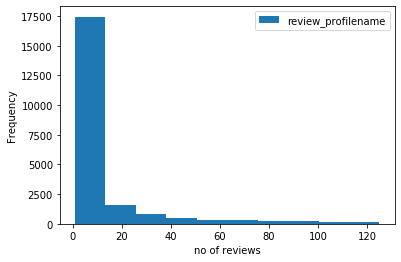

In [48]:
#lets plot and see the behviour in depth
review_profiles_1.plot.hist()
plt.xlabel('no of reviews')

we can observe that large no of users have given 1-30 reviews


In [51]:
# let us group by user's and see the variations in the review
user_profile = ratings_file.groupby('review_profilename')['review_overall'].count().reset_index()
user_profile_subset = user_profile[user_profile.review_overall >= 30]

user_profile_subset = user_profile_subset.sort_values('review_overall', ascending=False)

user_profile_subset.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


Here we can clearly see the top 5 users who have given highest number of reviews for beers

In [52]:
#lets create a new dataframe with filter of beer review>= 50 and the user review>= 30
rating_file_df = ratings_file.merge(beersubset,how='inner',on='beer_beerid')
rating_file_df = rating_file_df.merge(user_profile_subset,how='inner',on='review_profilename')

In [53]:
rating_file_df.head()

,beer_beerid,review_profilename,review_overall_x,review_overall_y,review_overall
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [54]:
#now lets rename the columns for easiness
rating_file_df.rename(columns={'review_overall_x' : 'rating','review_overall_y':'beer_reviews_count',
                           'review_overall' : 'user_reviews_count'},
                  inplace = True)

In [56]:
rating_file_df.head()

,beer_beerid,review_profilename,rating,beer_reviews_count,user_reviews_count
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [58]:
rating_file_df[rating_file_df.user_reviews_count==1842]

,beer_beerid,review_profilename,rating,beer_reviews_count,user_reviews_count
49554,16074,northyorksammy,4.0,431,1842
49555,960,northyorksammy,3.5,58,1842
49556,40153,northyorksammy,4.0,52,1842
49557,29687,northyorksammy,4.0,93,1842
49558,11757,northyorksammy,4.5,721,1842
...,...,...,...,...,...
50004,1015,northyorksammy,3.5,152,1842
50005,1275,northyorksammy,3.0,154,1842
50006,1309,northyorksammy,4.0,160,1842
50007,138,northyorksammy,4.0,168,1842


# 2. Data exploration

1. What are the unique values of ratings?

In [59]:
#lets see the unique values of ratings given
print(rating_file_df.rating.value_counts(ascending=True))

1.0     1120
1.5     1343
2.0     4474
2.5     7012
5.0    13081
3.0    21189
3.5    42543
4.5    51086
4.0    88240
Name: rating, dtype: int64


2. Visualise the rating values and notice:

a.) The average beer ratings

b.) The average user ratings

c.) The average number of ratings given to the beers

d.) The average number of ratings given by the users

In [60]:
#a. The average beer ratings
#lets group by beerid to find out the average rating given to beer's
average_beer_ratings = rating_file_df.groupby('beer_beerid')['rating'].agg(['mean']).reset_index()
average_beer_ratings.head()

,beer_beerid,mean
0,5,3.532609
1,6,3.707895
2,7,3.272109
3,10,3.859116
4,14,3.911765


Text(0, 0.5, 'Number of Beers')

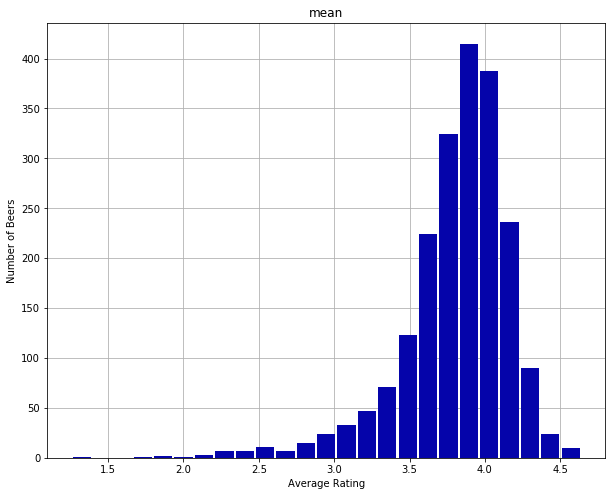

In [67]:
#As we know that there are huge no of beerid's
#lets plot a histogram to visualize the average beer ratings
average_beer_ratings.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of Beers')

From the above visualization we can clearly observe that majority of the rating given lies between 3.0 to 4.5

In [68]:
#lets see the average beer ratings in the original data set without any cleaning to see if the analysis is going on correctly without much affect after initial cleaning

avg_beer_rating_full_data = ratings_file.groupby('beer_beerid')['review_overall'].agg(['mean']).reset_index()
avg_beer_rating_full_data.head()

,beer_beerid,mean
0,3,4.250000
1,4,3.666667
2,5,3.553097
3,6,3.711462
4,7,3.317073


Text(0, 0.5, 'number of Beers')

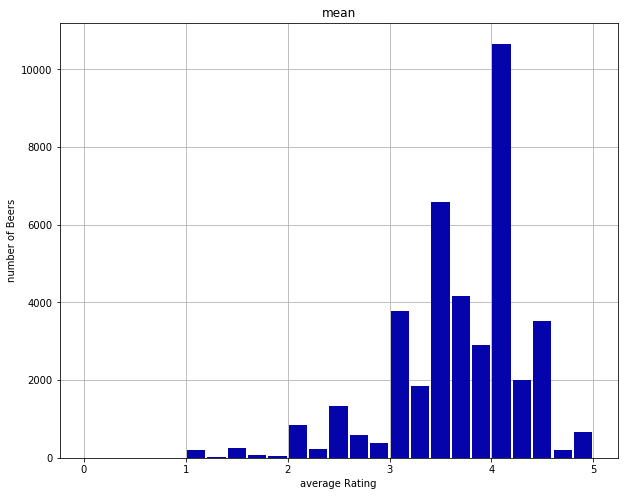

In [69]:
#lets visualize through histogram plot
avg_beer_rating_full_data.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of Beers')

We can see that the majority of the ratings still lie between 3 to 4.5 itself

In [70]:
#b. the avergae user ratings
#lets group by review_profilename to find out the average rating given by user
average_user_ratings = rating_file_df.groupby('review_profilename')['rating'].agg(['mean']).reset_index()
average_user_ratings.head()

,review_profilename,mean
0,0110x011,4.333333
1,05Harley,4.116667
2,100floods,4.155172
3,1759Girl,3.725000
4,1fastz28,3.875000


Text(0, 0.5, 'number of users')

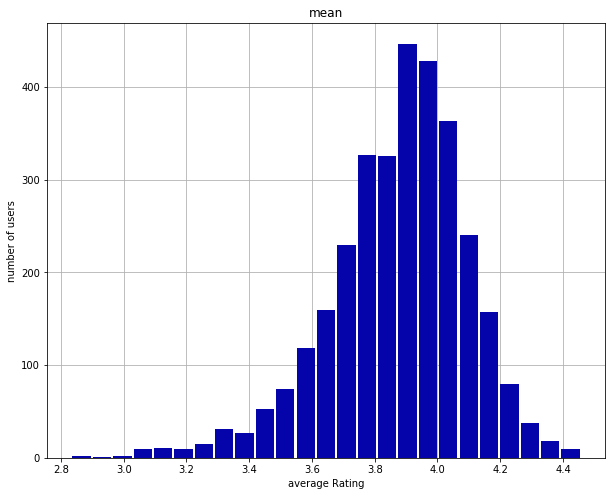

In [71]:
#As we know that there are huge no of beerid's
#lets plot a histogram to visualize the average beer ratings
average_user_ratings.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of users')

we can observe from the above visualization that most of the users have average rating falling between 3.5 to 4.5

In [72]:
#lets see the average beer ratings in the original data set without any cleaning to see if the analysis is going on correctly without much affect after initial cleaning

avg_user_rating_full_data = ratings_file.groupby('review_profilename')['review_overall'].agg(['mean']).reset_index()
avg_user_rating_full_data.head()

,review_profilename,mean
0,0110x011,4.285714
1,01Ryan10,5.000000
2,03SVTCobra,1.000000
3,04101Brewer,4.000000
4,05Harley,4.158537


Text(0, 0.5, 'number of users')

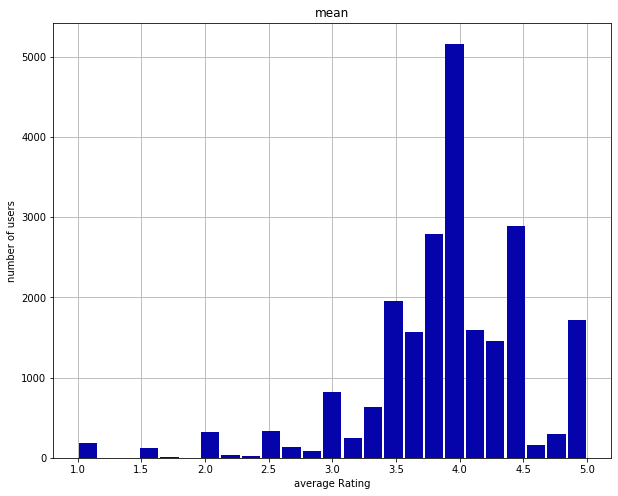

In [73]:
#lets visualize through histogram plot
avg_user_rating_full_data.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of users')

In [75]:
#c. The average number of ratings given to the beers
average_beer_reviews = rating_file_df.groupby('beer_beerid')['beer_reviews_count'].agg(['mean']).reset_index()
average_beer_reviews.head()

,beer_beerid,mean
0,5,113
1,6,253
2,7,205
3,10,218
4,14,59


Text(0, 0.5, 'number of beers')

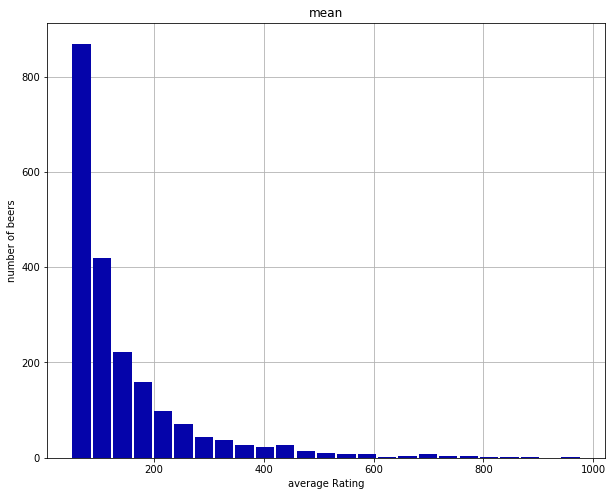

In [76]:
#lets visualize through histogram plot
average_beer_reviews.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of beers')

we can observe that most of reviews give for beers between 50 to 200 

In [78]:
#d. The average number of ratings given by the users
average_user_reviews = rating_file_df.groupby('review_profilename')['user_reviews_count'].agg(['mean']).reset_index()
average_user_reviews.head()

,review_profilename,mean
0,0110x011,35
1,05Harley,41
2,100floods,44
3,1759Girl,73
4,1fastz28,124


Text(0, 0.5, 'number of users')

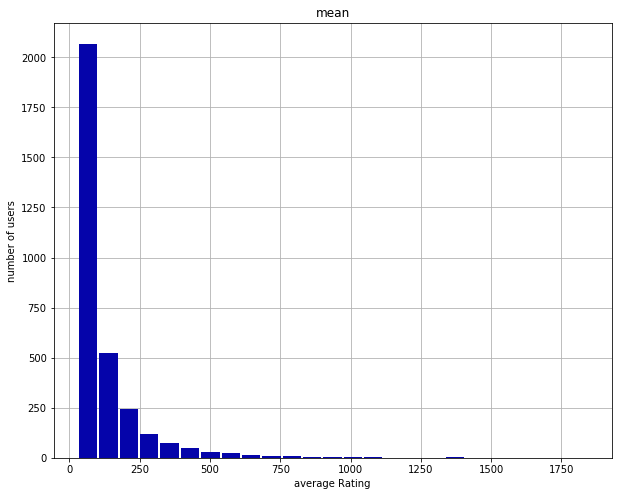

In [79]:
#lets visualize through histogram plot
average_user_reviews.hist(column='mean', bins=25, grid=True, figsize=(10,8), color='#0504aa', zorder=2, rwidth=0.9)
plt.xlabel('average Rating')
plt.ylabel('number of users')

# 3.Recommendation Models

In [80]:
#1. Divide your data into training and testing dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(rating_file_df, test_size=0.30, random_state=31)

In [81]:
print(train.shape)
print(test.shape)

(161061, 5)
(69027, 5)


# 2. Build user-based and item-based models.

In [82]:
#2. Build user-based and item-based models.

# pivot ratings into Beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [83]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Copy train and test dataset

These dataset will be used for prediction and evaluation.

- Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction.

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [84]:
dummy_train = train.copy()
dummy_test = test.copy()

In [85]:
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [86]:
# The beers that are not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(1)

# The beers that are not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [87]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# user similarity Matrix

## Using Cosine Similarity

In [89]:
#lets proceed with building the matrix
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.0602183  ... 0.         0.         0.        ]
 [0.         1.         0.10346685 ... 0.03699533 0.0236273  0.        ]
 [0.0602183  0.10346685 1.         ... 0.0406859  0.04209458 0.        ]
 ...
 [0.         0.03699533 0.0406859  ... 1.         0.         0.        ]
 [0.         0.0236273  0.04209458 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [90]:
#lets see the correlation shape
user_correlation.shape

(3176, 3176)

# Using adjusted Cosine

- Here, not removing the NaN values and calculating the mean only for the movies rated by the user

In [92]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Normalising the rating of the movie for each user aroung 0 mean

In [93]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.414286,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.414286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding the cosine similarity

In [94]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.06414558 ...  0.          0.
   0.        ]
 [ 0.          1.         -0.00228504 ... -0.05790255  0.06023922
   0.        ]
 [-0.06414558 -0.00228504  1.         ... -0.03519429  0.00183073
   0.        ]
 ...
 [ 0.         -0.05790255 -0.03519429 ...  1.          0.
   0.        ]
 [ 0.          0.06023922  0.00183073 ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


# Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [95]:
#lets get the user correlation
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06023922,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00183073,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.06023922, 0.00183073, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [96]:
#lets fill the na values with 0
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[0.60740569, 1.72279843, 1.36537555, ..., 0.62420766, 2.78695303,
        0.99231436],
       [1.64187597, 2.19901147, 0.68375015, ..., 0.77148987, 2.04906253,
        0.87085684],
       [0.50868217, 1.82480268, 1.04838097, ..., 0.4432223 , 1.66992617,
        1.01367289],
       ...,
       [5.4615181 , 9.28403854, 6.24694338, ..., 1.13753439, 2.05371077,
        2.43409095],
       [1.94987669, 7.03871264, 4.32649666, ..., 1.48588393, 3.63541061,
        2.413668  ],
       [2.79919408, 5.30058669, 4.10148393, ..., 0.7447872 , 1.28456455,
        1.13771762]])

In [97]:
#lest see the predicted ratings 
user_predicted_ratings.shape

(3176, 2064)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero.

In [98]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254,...,3.390042,0.677360,0.326128,0.253216,0.442418,0.547199,0.265393,0.624208,2.786953,0.992314
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936,...,2.962885,1.561487,1.674791,1.224707,1.361091,0.912850,0.302531,0.771490,2.049063,0.870857
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559,...,2.772751,1.099367,0.921139,0.799246,0.928896,0.406420,0.375718,0.443222,1.669926,1.013673
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933,...,8.238620,1.740618,2.625025,1.563181,0.776449,2.044254,0.757676,1.002973,3.981609,2.350628
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486,...,6.401570,2.171791,0.000000,2.319006,2.686793,2.116601,1.817929,1.473303,3.677687,3.638288


# Finding the top 5 recommendation for the user 1

In [99]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
7971    13.885626
412     13.780658
1093    12.523484
731     12.490436
4083    12.247701
Name: 05Harley, dtype: float64

# 3. Determine how similar the first 10 users are to each other and visualise it.

In [100]:
#lets see the data of first ten users
first_ten_user = user_final_rating.iloc[:10,:10]
first_ten_user.head(10)

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486
32hoss32,5.463102,12.542396,8.103772,10.358917,3.220584,3.420030,11.803124,13.588931,20.695294,15.317890
3Vandoo,3.542465,8.935916,6.509780,7.186134,2.922117,2.722449,8.319834,6.465149,15.520371,15.943180
4000qtrap,0.863029,3.192234,2.678842,5.016206,0.555923,1.190761,3.205879,3.104515,7.042174,4.860710
4DAloveofSTOUT,1.031059,2.927596,1.300396,2.913080,1.051519,0.469621,2.239036,2.239323,4.633891,2.483707


In [101]:
#lets get the transpose of the ten users data
first_ten_user_T = first_ten_user.transpose()
first_ten_user_T.head(10)

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
beer_beerid,,,,,,,,,,
5,0.607406,1.641876,0.508682,3.654447,4.260667,5.463102,3.542465,0.863029,1.031059,1.399489
6,1.722798,2.199011,1.824803,5.765699,0.000000,12.542396,8.935916,3.192234,2.927596,3.298513
7,1.365376,0.683750,1.048381,5.281095,4.846008,8.103772,6.509780,2.678842,1.300396,3.264341
10,2.133627,4.119564,2.556826,5.064425,0.000000,10.358917,7.186134,5.016206,2.913080,3.318713
14,0.369895,1.142683,0.508363,1.357946,1.676340,3.220584,2.922117,0.555923,1.051519,1.038088
15,0.383252,0.498070,0.473822,1.871067,2.468645,3.420030,2.722449,1.190761,0.469621,1.649017
17,2.128028,2.202979,2.041114,5.197184,7.305227,11.803124,8.319834,3.205879,2.239036,2.685069
19,1.836918,2.498159,0.524179,4.365944,6.270055,13.588931,6.465149,3.104515,2.239323,3.551101
30,2.817660,6.628212,4.925649,13.376856,17.198941,20.695294,15.520371,7.042174,4.633891,8.617721


In [102]:
#lets obtain the correlation matrix using pearson method
first_ten_user_T.corr(method ='pearson')

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
review_profilename,,,,,,,,,,
0110x011,1.000000,0.826983,0.836336,0.786875,0.584087,0.935757,0.820637,0.937759,0.916493,0.769789
05Harley,0.826983,1.000000,0.916609,0.817613,0.659148,0.848956,0.780358,0.912185,0.930229,0.808542
100floods,0.836336,0.916609,1.000000,0.892129,0.695038,0.836225,0.872343,0.930956,0.903714,0.857482
1759Girl,0.786875,0.817613,0.892129,1.000000,0.850593,0.892964,0.975106,0.878868,0.804835,0.979605
1fastz28,0.584087,0.659148,0.695038,0.850593,1.000000,0.739882,0.790165,0.648851,0.563072,0.848842
32hoss32,0.935757,0.848956,0.836225,0.892964,0.739882,1.000000,0.907143,0.912754,0.922537,0.888501
3Vandoo,0.820637,0.780358,0.872343,0.975106,0.790165,0.907143,1.000000,0.877864,0.810574,0.964511
4000qtrap,0.937759,0.912185,0.930956,0.878868,0.648851,0.912754,0.877864,1.000000,0.924094,0.884601
4DAloveofSTOUT,0.916493,0.930229,0.903714,0.804835,0.563072,0.922537,0.810574,0.924094,1.000000,0.783000


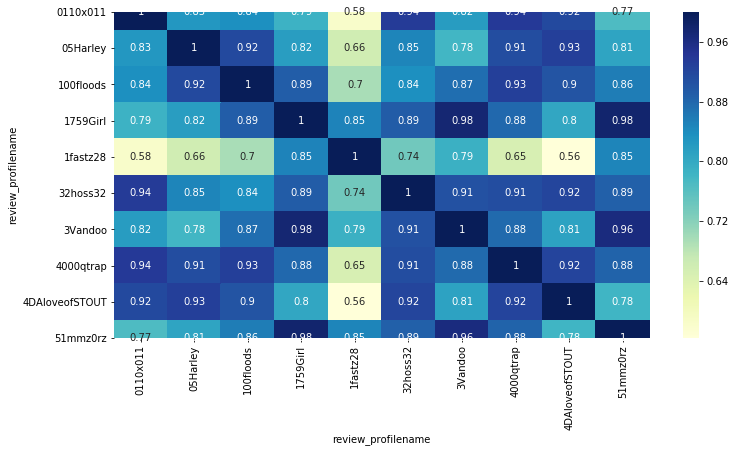

In [108]:
#lets plot teh heatmap of the correlation matrix and see the correlation between the users
plt.figure(figsize=(12,6))
sns.heatmap(first_ten_user_T.corr(method ='pearson'),annot=True,cmap='YlGnBu')
plt.show()



# 4. Compute and visualise the similarity between the first 10 beers.

# Item based similarity


Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user intead of each movie.

In [110]:
#lets perform item based similarity for analysing and visualizing based on the beers
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#Normalising the beer rating for each beer
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T
df_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.209559,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,0.153226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value.

In [112]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.04400353  0.10450266 ...  0.          0.01444095
   0.        ]
 [-0.04400353  1.          0.09372582 ...  0.0850787   0.0028846
   0.        ]
 [ 0.10450266  0.09372582  1.         ...  0.0035514   0.00416595
  -0.00307617]
 ...
 [ 0.          0.0850787   0.0035514  ...  1.         -0.00953562
   0.02076853]
 [ 0.01444095  0.0028846   0.00416595 ... -0.00953562  1.
  -0.01370386]
 [ 0.          0.         -0.00307617 ...  0.02076853 -0.01370386
   1.        ]]


In [113]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.10450266, ..., 0.        , 0.01444095,
        0.        ],
       [0.        , 1.        , 0.09372582, ..., 0.0850787 , 0.0028846 ,
        0.        ],
       [0.10450266, 0.09372582, 1.        , ..., 0.0035514 , 0.00416595,
        0.        ],
       ...,
       [0.        , 0.0850787 , 0.0035514 , ..., 1.        , 0.        ,
        0.02076853],
       [0.01444095, 0.0028846 , 0.00416595, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02076853, 0.        ,
        1.        ]])

# Prediction

In [115]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.34235531, 0.75140313, 0.3725019 , ..., 0.4798347 , 0.51727737,
        0.77667071],
       [0.71201797, 0.61201673, 0.74136727, ..., 0.29537101, 0.96046555,
        0.70915081],
       [0.4610979 , 0.57293613, 0.84695463, ..., 0.44862372, 1.62539371,
        1.21536412],
       ...,
       [1.05588008, 1.64889637, 1.67259081, ..., 0.39409505, 0.7575991 ,
        1.69761257],
       [1.05237359, 1.68876966, 1.94192558, ..., 1.24434921, 1.03048876,
        1.72885155],
       [0.77920154, 0.98848806, 1.95106329, ..., 0.22335889, 0.2721665 ,
        0.45937481]])

In [116]:
item_predicted_ratings.shape

(3176, 2064)

In [117]:
dummy_train.shape

(3176, 2064)

# Filtering the rating only for the beers not rated by the user for recommendation


In [120]:
item_rating_final = np.multiply(item_predicted_ratings,dummy_train)
item_rating_final.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090,...,1.191960,0.412804,0.409965,0.477528,0.291183,0.658500,0.153989,0.479835,0.517277,0.776671
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822,...,0.852472,0.167492,0.283364,0.594851,0.426807,0.882157,1.132680,0.295371,0.960466,0.709151
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469,...,0.914051,0.767967,1.061601,0.782607,0.977393,0.424092,1.789367,0.448624,1.625394,1.215364
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998,...,0.786347,1.258554,1.002897,1.065330,0.618888,0.886222,1.026076,0.433305,1.075807,1.523836
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729,...,3.086705,3.051129,0.000000,1.828889,1.196344,1.753731,3.142080,1.587389,1.649391,4.243231


# Top 5 prediction for the user-1

In [119]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
48194    2.632030
34363    2.451880
33894    2.384289
1504     2.347642
34094    2.344075
Name: 05Harley, dtype: float64

In [121]:
#lets get the first ten beers data
first_ten_beer = item_final_rating.iloc[:10,:10]
first_ten_beer.head(10)

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729
32hoss32,0.555701,1.089635,1.396297,1.516364,1.079436,1.042607,0.977324,0.606880,0.771947,0.924730
3Vandoo,1.076917,1.129220,1.027566,1.623240,2.466679,1.030707,1.227803,1.300322,1.259056,2.756709
4000qtrap,0.504887,1.506075,1.468067,1.167652,0.853308,1.690247,1.013523,0.892992,1.057554,1.249679
4DAloveofSTOUT,0.691417,0.668843,0.684541,0.898537,0.431441,0.628534,1.131348,0.557950,2.930775,1.123848


In [122]:
first_ten_beer.corr(method ='pearson')

beer_beerid,5,6,7,10,14,15,17,19,30,31
beer_beerid,,,,,,,,,,
5,1.000000,-0.527641,0.895456,-0.301677,0.874808,0.834278,0.885416,0.930841,0.461833,0.940144
6,-0.527641,1.000000,-0.377643,0.828023,-0.378548,-0.458237,-0.561957,-0.474073,-0.652996,-0.389606
7,0.895456,-0.377643,1.000000,-0.309671,0.739887,0.919637,0.907421,0.874353,0.242460,0.825554
10,-0.301677,0.828023,-0.309671,1.000000,-0.122033,-0.444623,-0.527230,-0.326044,-0.519869,-0.197620
14,0.874808,-0.378548,0.739887,-0.122033,1.000000,0.786088,0.720470,0.930358,0.139877,0.928153
15,0.834278,-0.458237,0.919637,-0.444623,0.786088,1.000000,0.837635,0.918424,0.220441,0.803929
17,0.885416,-0.561957,0.907421,-0.527230,0.720470,0.837635,1.000000,0.875386,0.425382,0.852991
19,0.930841,-0.474073,0.874353,-0.326044,0.930358,0.918424,0.875386,1.000000,0.320251,0.965098
30,0.461833,-0.652996,0.242460,-0.519869,0.139877,0.220441,0.425382,0.320251,1.000000,0.330219


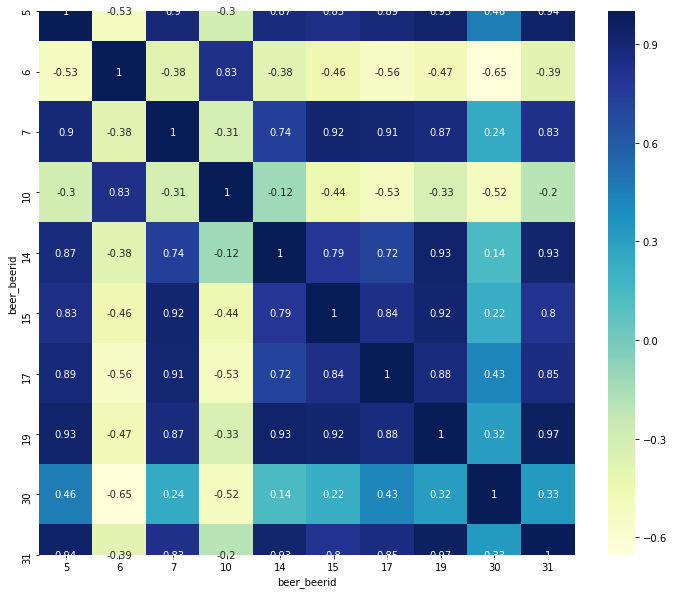

In [123]:
plt.figure(figsize=(12,10))
sns.heatmap(first_ten_beer.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

# 5. Compare the performance of the two models using test data and suggest the one that should be deployed

# Using User Similarity

In [124]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.00000000e+00 -9.94756754e-03  0.00000000e+00 ...  8.12730982e-04
   6.02316422e-02  0.00000000e+00]
 [-9.94756754e-03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.12730982e-04  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   3.81129997e-03  0.00000000e+00]
 [ 6.02316422e-02  0.00000000e+00  0.00000000e+00 ...  3.81129997e-03
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [125]:
#lets see the correlation and the prediction ratings
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.41939745, 0.2239049 , 0.79532046, ..., 0.54059044, 2.14354489,
        0.21766579],
       [0.36384749, 0.20596454, 0.60289483, ..., 1.26725901, 0.00927267,
        0.75379087],
       [0.07257225, 0.2557648 , 0.36255464, ..., 0.11783901, 0.15126308,
        0.01956389],
       ...,
       [1.39301769, 3.26215724, 1.17950817, ..., 1.32916552, 0.09780408,
        1.45608938],
       [0.77927749, 0.80168546, 0.31702962, ..., 0.18221054, 0.80894388,
        0.48848761],
       [0.71590046, 1.05053414, 0.59297741, ..., 0.        , 1.08198966,
        0.04651303]])

# Doing prediction for the beers rated by the user

In [126]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
#lets perform RMSE calculation for comparing the performance of the user based and item based models

#Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [128]:
#lets create a test data set
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [129]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [130]:
#lets see the RMSE value for it
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.8034893114553268


we see that the RMSE value for user based model is 1.8034, lets check the same for item based model and then conclude which is a better one to prefer

# Using Item similarity

In [131]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [132]:
test_item_correlation.shape

(2064, 2064)

In [133]:
test_beer_features.shape

(2064, 3174)

In [134]:
#lets see the correlation and the prediction ratings
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
#lets create a test data set
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [136]:
#Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [137]:
#finding the RMSE value
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.095085268824015


We can see that the RMSE value for item based model is 2.095

Hence from above calculation;
- RMSE(user based model) = 1.803
- RMSE(item based model) = 2.095

Therefore it is very clear that the user based model should be preferred over item based as the RMSE value if smaller for user based model


# 6.  Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

# A. USER BASED RECOMMENDATIONS:
    

In [138]:
#1.COKES:
user_based_recmd_cokes = pd.DataFrame(user_final_rating[user_final_rating.index=='cokes']).T
user_based_recmd_cokes.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
412,30.135874
4083,28.686617
34,28.152674
1708,27.780130
695,27.569453


In [139]:
#2.GENOG:
user_based_recmd_genog = pd.DataFrame(user_final_rating[user_final_rating.index=='genog']).T
user_based_recmd_genog.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
412,30.424666
1093,30.370341
131,29.547832
2093,29.526754
1904,27.638449


In [140]:
#3.GIBLET:
user_based_recmd_giblet = pd.DataFrame(user_final_rating[user_final_rating.index=='giblet']).T
user_based_recmd_giblet.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
2093,39.699155
412,38.796605
92,37.226070
355,36.930561
1093,36.117622


the above beerid's are the recomendded ones through User based model

# B. ITEM BASED RECOMMENDATIONS:

In [141]:
#1. COKES:
cokes_item = pd.DataFrame(item_final_rating[user_final_rating.index=='cokes']).T
cokes_item.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
3706,16.673912
20524,14.975975
53899,14.254801
7879,13.773010
30858,13.450961


In [142]:
#2. GENOG:
genog_item = pd.DataFrame(item_final_rating[user_final_rating.index=='genog']).T
genog_item.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
10301,6.070267
2361,6.051229
34313,5.725930
36179,5.650048
34484,5.433297


In [143]:
#3. GIBLET:
giblet_item = pd.DataFrame(item_final_rating[user_final_rating.index=='giblet']).T
giblet_item.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
573,3.799396
54413,3.686785
159,3.677000
1075,3.479484
3711,3.376210


The above beerid's are the recomendded one's for the three users from the item based model.

# Hence we come to an end of the beer mart analysis.